# Stats - frequency and intensity

$$z_{frequency} =
    \begin{cases}
    0, (X - P_{10_{hist}}) \geq 0 \\
    1, (X - P_{10_{hist}}) < 0
    \end{cases}
$$

$$z_{intensity} = \frac{X - P_{10_{hist}}}{\sigma_{hist}}$$

- calculate annual means (or seasonal means for each year)
- calculate the historical 10th percentile and standard deviation from the annual means
- minus the 10th percentile
- calculate frequency and severity
- calculate sum / average of annual normalised data
- calculate ensemble means

In [1]:
import glob
import importlib
import itertools
import os
import sys
from datetime import datetime, timezone
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import climag.climag as cplt
from climag import climag_plot
import pandas as pd
import seaborn as sns

In [2]:
def plot_heatmap(dataset, model=0, rlat=15, rlon=15):
    for v in list(dataset.data_vars):
        dataset_df = dataset.isel(model=model, rlat=rlat, rlon=rlon)[v].to_dataframe()[[v]].dropna().reset_index().pivot(index="exp", columns="year", values=v)
        plt.figure(figsize=(15, 5))
        sns.heatmap(dataset_df, center=0, cmap="RdBu", xticklabels=True)
        plt.title(v)
        plt.tight_layout()
        plt.show()

In [10]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

## EURO-CORDEX

In [3]:
ds_ec = cplt.load_all_data("EURO-CORDEX")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [4]:
ds_ec_norm, ds_ec_freq, ds_ec_int = cplt.calc_event_frequency_intensity(ds_ec)

In [6]:
ds_ec_freq_reduced = ds_ec_freq.sum(dim="year", skipna=True).mean(dim="model", skipna=True)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy

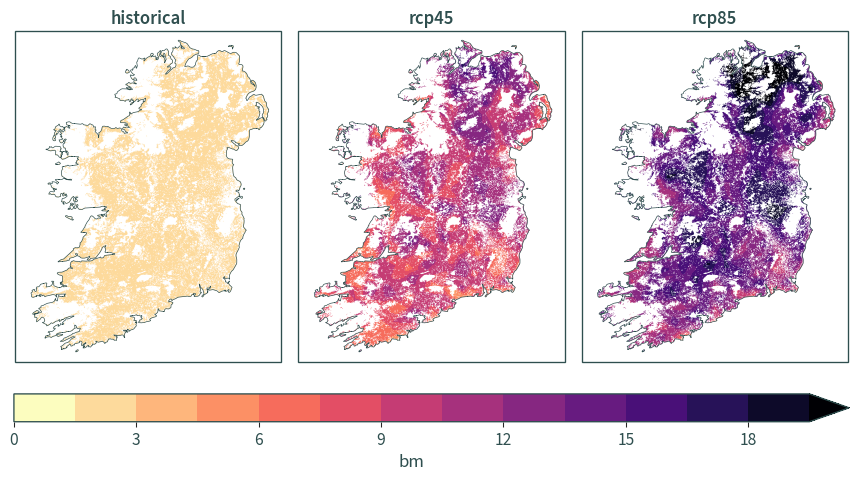

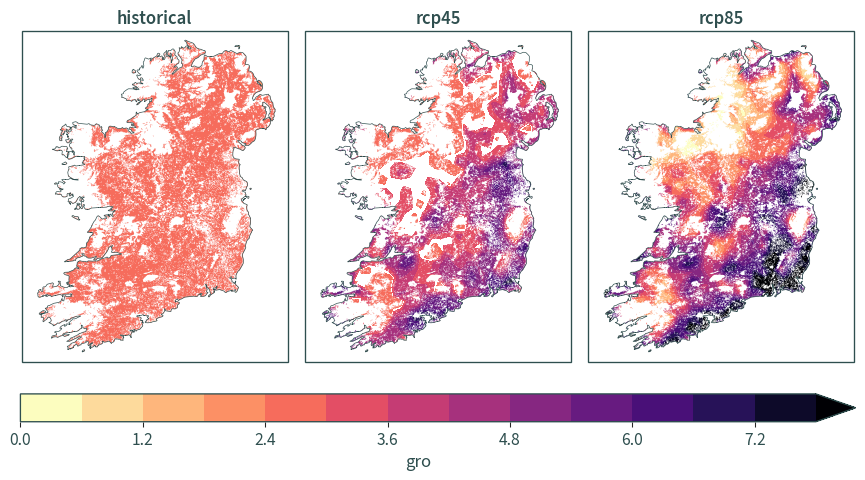

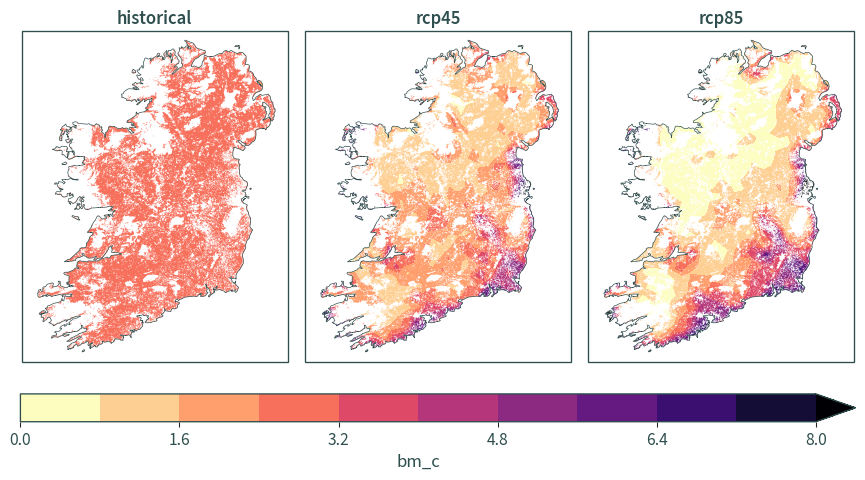

In [7]:
cplt.plot_stats(ds_ec_freq_reduced, cplt.projection_eurocordex, cmap="magma_r")

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


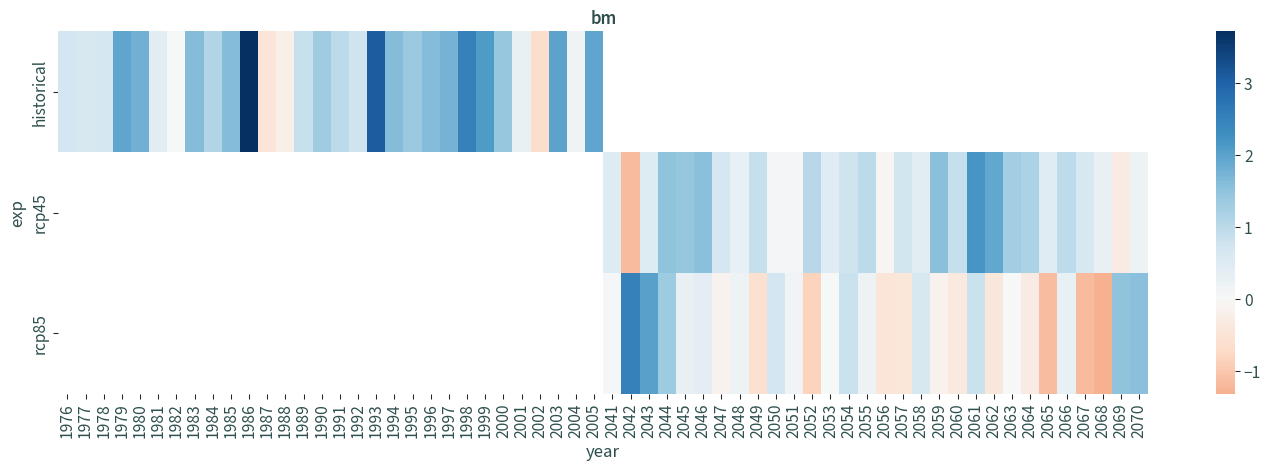

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


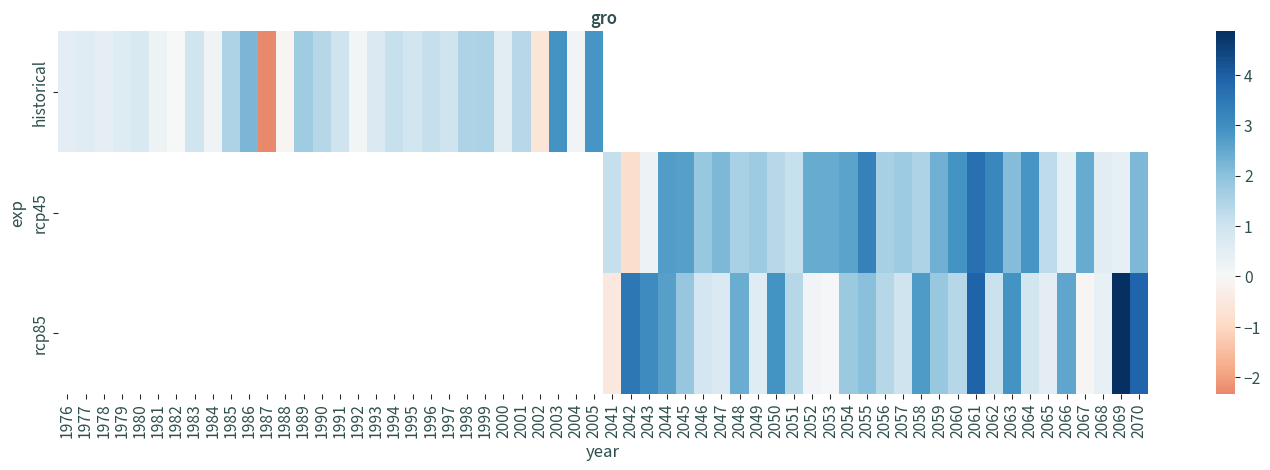

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


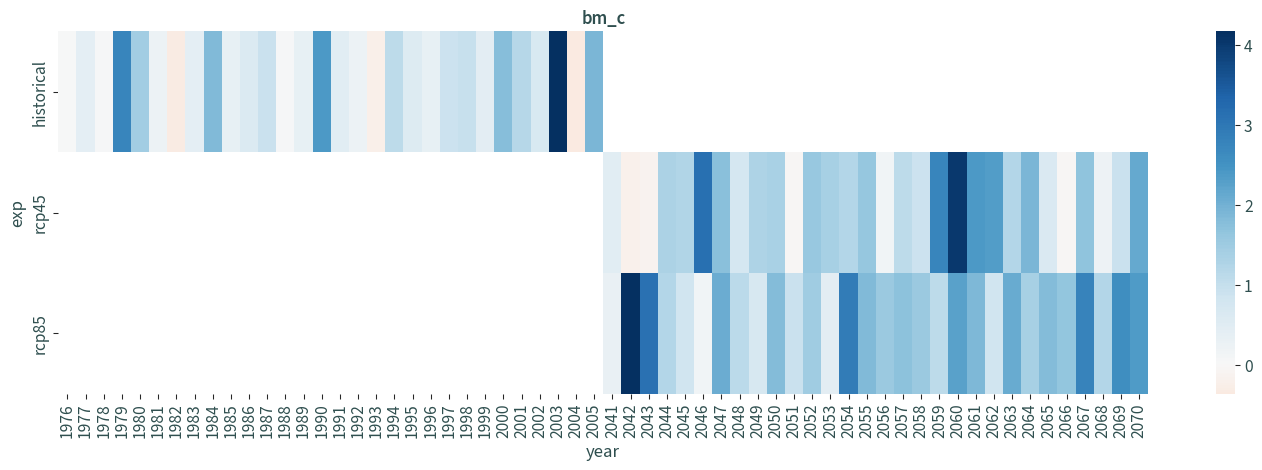

In [5]:
plot_heatmap(ds_ec_int)

In [8]:
ds_ec_int_reduced = ds_ec_int.mean(dim="year", skipna=True).mean(dim="model", skipna=True)

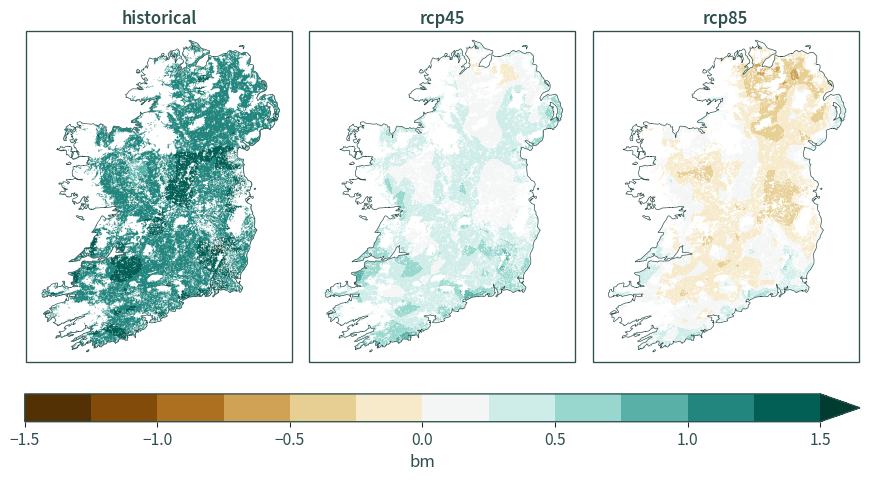

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy

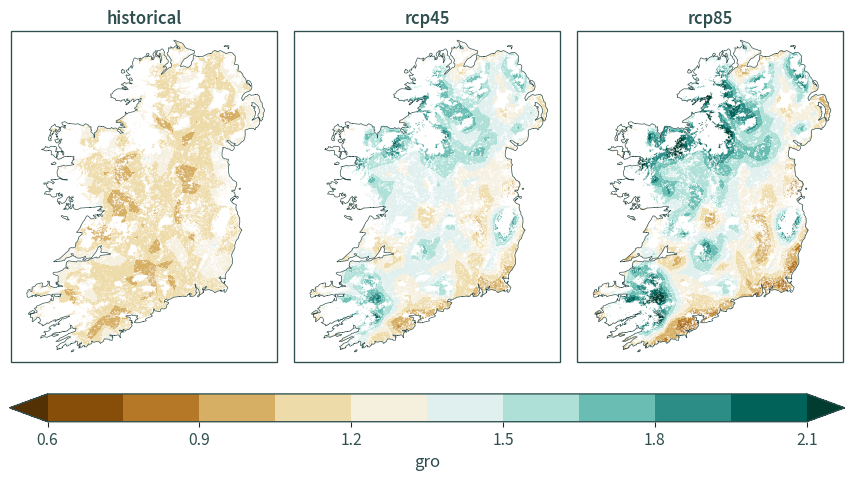

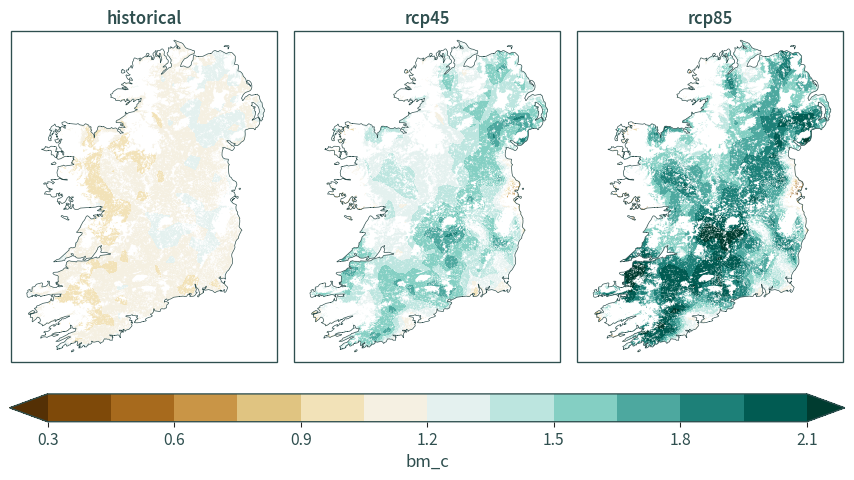

In [10]:
cplt.plot_stats(ds_ec_int_reduced, cplt.projection_eurocordex)

## HiResIreland

In [11]:
ds_hr = cplt.load_all_data("HiResIreland")

In [12]:
ds_hr_norm, ds_hr_freq, ds_hr_int = cplt.calc_event_frequency_intensity(ds_hr)

In [13]:
ds_hr_freq_reduced = ds_hr_freq.sum(dim="year", skipna=True).mean(dim="model", skipna=True)

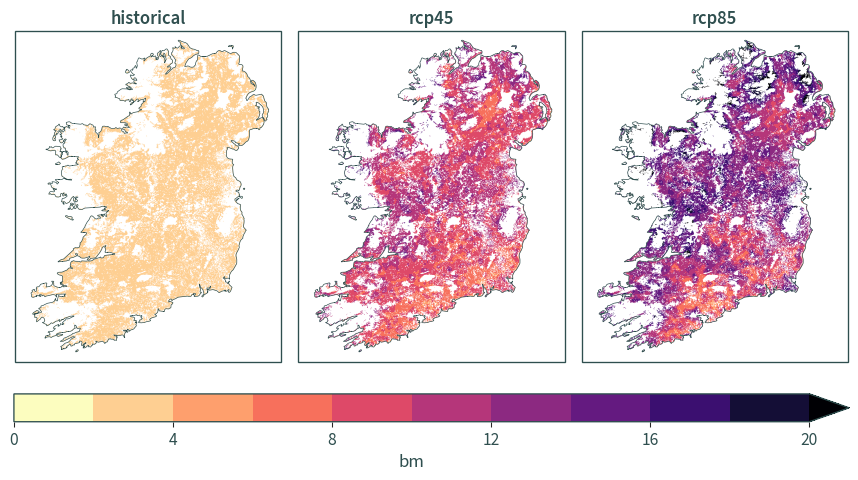

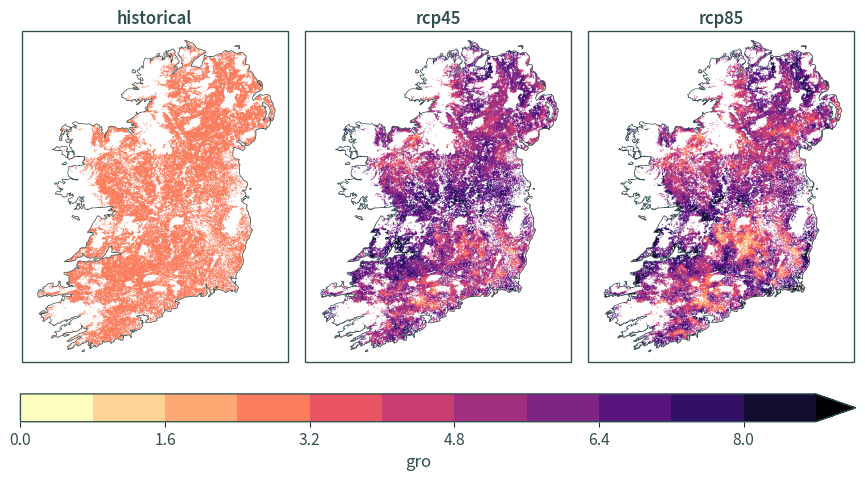

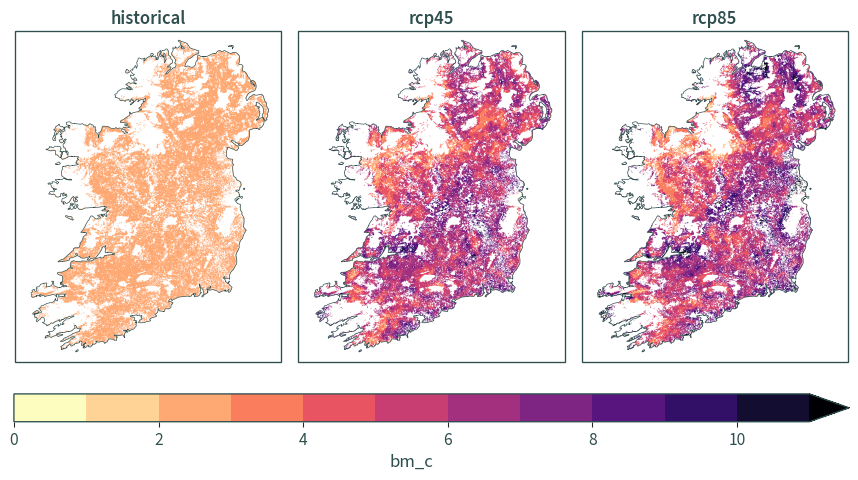

In [14]:
cplt.plot_stats(ds_hr_freq_reduced, cplt.projection_hiresireland, cmap="magma_r")

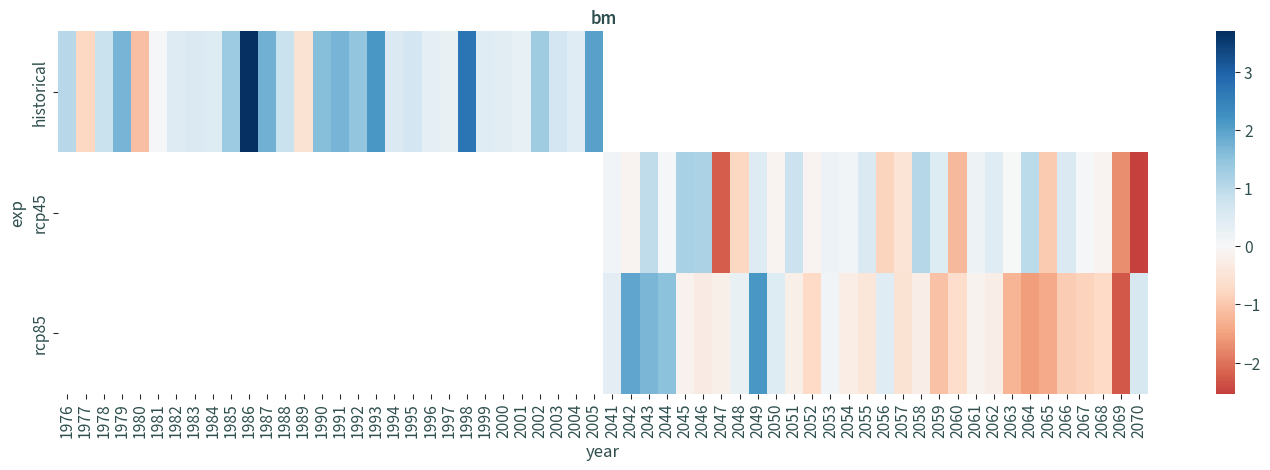

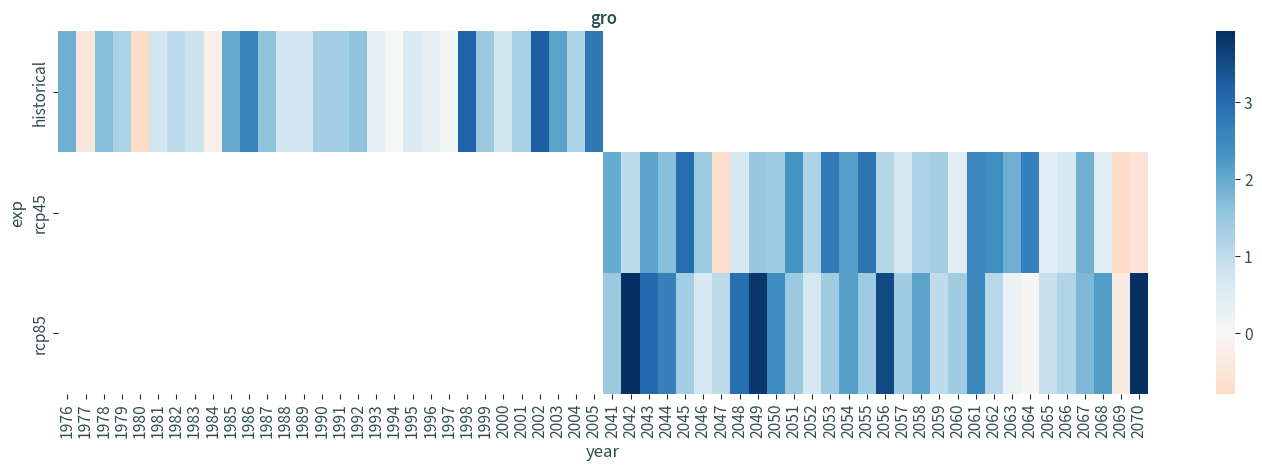

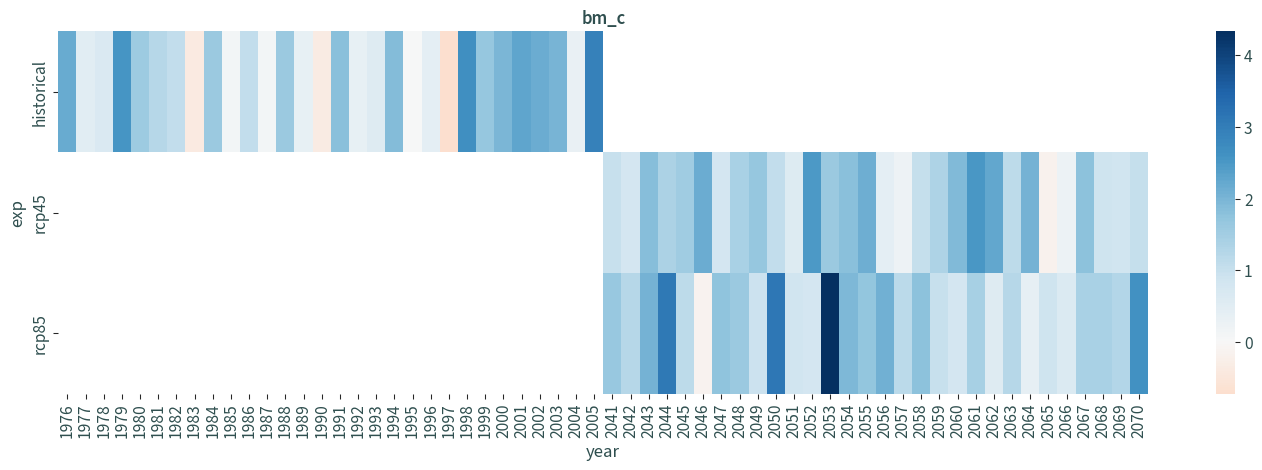

In [15]:
plot_heatmap(ds_hr_int)

In [16]:
ds_hr_int_reduced = ds_hr_int.mean(dim="year", skipna=True).mean(dim="model", skipna=True)

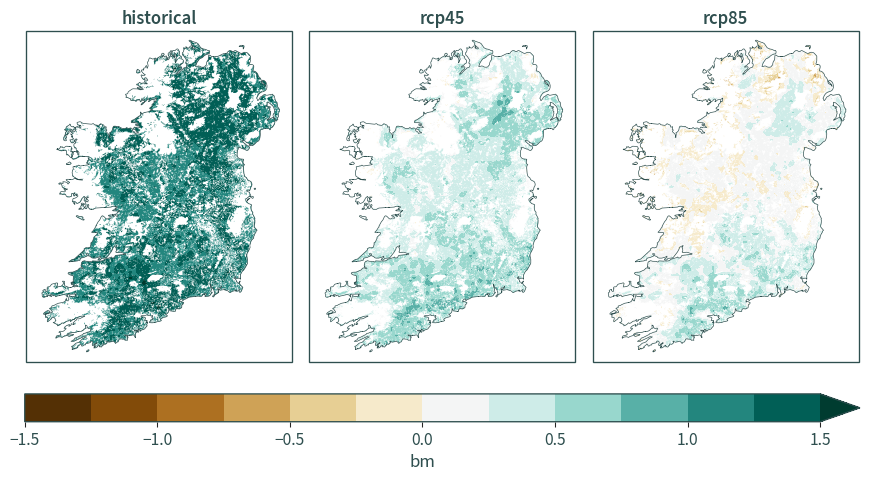

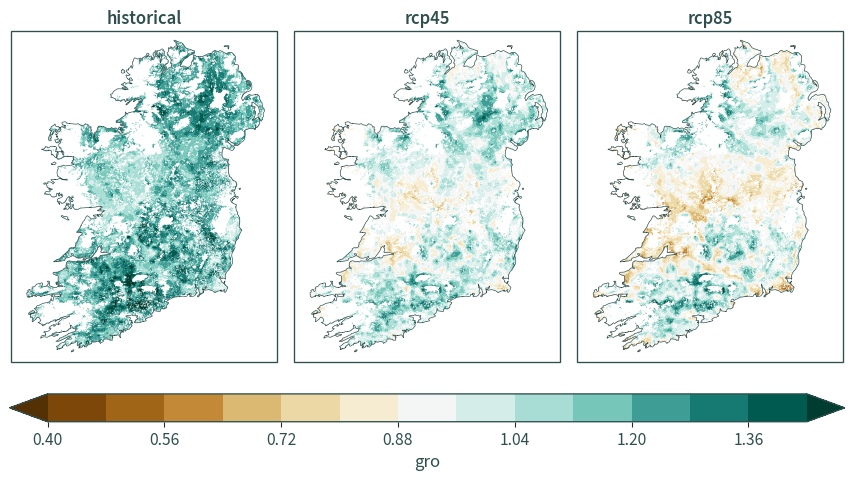

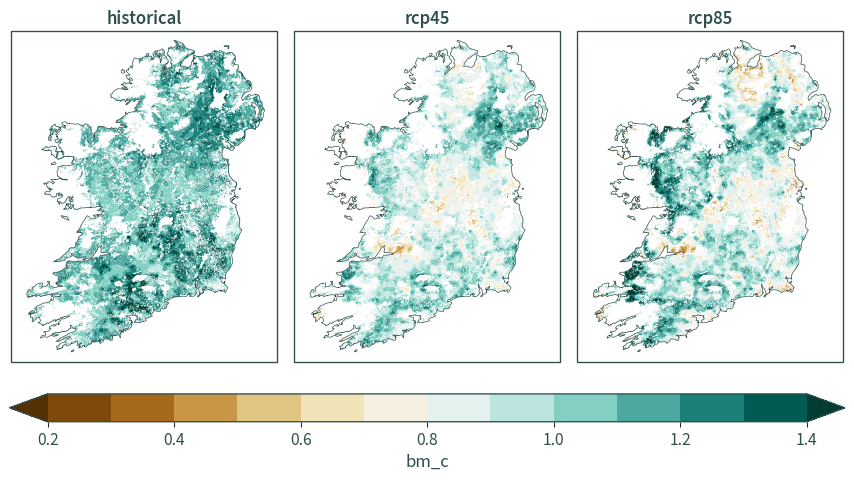

In [17]:
cplt.plot_stats(ds_hr_int_reduced, cplt.projection_hiresireland)